Sample data:
  Label                                            Message
0   ham  Hey! Can you send me the slides from today’s c...
1  spam     You’ve won a car, which is fully free of cost!
2   ham                                      Work is done!
3  spam  Congratulations! You've won a prize, click her...
4   ham          I sent the documents yesterday, Check it!
Accuracy: 83.33%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



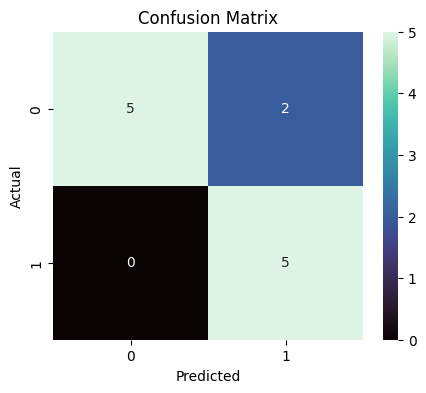


 Sample Predictions:

Message 1: can class from hey me send slides the today you
Prediction: Ham

Message 2: free get now tv
Prediction: Spam

Message 3: complete documentation let the today
Prediction: Ham

Message 4: app future knows this your
Prediction: Spam

Message 5: free get lucky smartwatch winner your
Prediction: Spam


In [1]:
# Import necessary libraries
import pandas as pd  # For data handling
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn.feature_extraction.text import CountVectorizer  # To convert text to numerical data
from sklearn.naive_bayes import MultinomialNB # Naive Bayes model for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Evaluation metrics
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns # For better-looking visualizations

# Load the dataset
df = pd.read_csv("spam_email_data.csv")

# Check the first few rows
print("Sample data:")
print(df.head())

# Rename columns 
df.columns = ['Label', 'Message'] # Ensure column names are clear

# Encode labels ('ham' -> 0, 'spam' -> 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Separate features (X) and labels (y)
X = df['Message']  # The email messages
y = df['Label']    # Labels: 0 for ham, 1 for spam

# Convert text to numeric features using Bag of Words
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Predict on test data
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix using Seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Sample predictions 
print("\n Sample Predictions:")
X_test_text = X_test[:5].toarray()  # Get the first 5 test samples
sample_msgs = vectorizer.inverse_transform(X_test_text)  # Convert vectors back to words

for i in range(len(sample_msgs)):
    print(f"\nMessage {i+1}: {' '.join(sample_msgs[i])}")
    print("Prediction:", "Spam" if y_pred[i] == 1 else "Ham")
